<img src="../img/htw-logo.png" width=150>


**I758 Wissens- und KI-basierte Systeme**

# Dimensionsreduktion und Clustering für Bilddaten
 

<font color="green"><b>KLAUSURTAUGLICH.</b></font>
Dieses Notebook gehört zu den fünf Notebooks, die Sie für die Klausur einreichen können. Bei vollständiger und korrekter Bearbeitung **erhalten Sie Punkte für die Abgabe, die zu Ihrer Klausur addiert werden.**




In diesem Beispiel wollen wir mit dem 'digits' Datensatz aus Scikit Learn arbeiten. Der Datensatz enthält handgeschriebene Ziffern von 0 bis 9. Unser Ziel ist 
- die Daten zu analysieren
- sie mit Dimensionsreduktion zu visualisieren
- in den dimensionsreduzierten Daten Cluster (eben genau 10 Stück zu finden)
- einen Klassifikator zu bauen, der diese Cluster wiederfinden kann

In [3]:
import numpy as np

from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 10; # samples: 1797; # features 64


<div class="alert alert-block alert-success">
<b>Arbeitsauftrag:</b> 
Schlagen Sie die Verwendung der PCA aus `sklearn` nach und erstellen Sie eine PCA von data!
Erstellen Sie dann eine weitere PCA, die die Daten auf zwei Dimensionen reduziert.
</div>

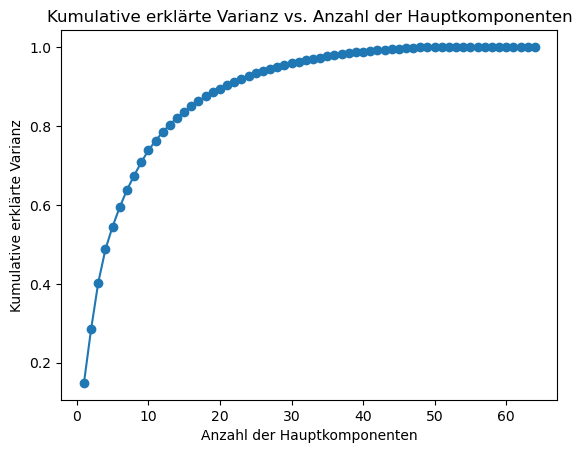

In [6]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)

pca = PCA()
data_pca = pca.fit_transform(data)

explained_var_ratio = pca.explained_variance_ratio_
cumulative_explained_var = np.cumsum(explained_var_ratio)

plt.plot(range(1, len(cumulative_explained_var) + 1), cumulative_explained_var, marker='o')
plt.xlabel('Anzahl der Hauptkomponenten')
plt.ylabel('Kumulative erklärte Varianz')
plt.title('Kumulative erklärte Varianz vs. Anzahl der Hauptkomponenten')
plt.show()


<div class="alert alert-block alert-success">
<b>Arbeitsauftrag:</b> 
Plotten Sie die zweidimensionalen Daten! Das Ergebnis sollte ungefähr so aussehen wie in diesem Bild:<br><br>
<img src="img/1.png" width=100px>
</div>

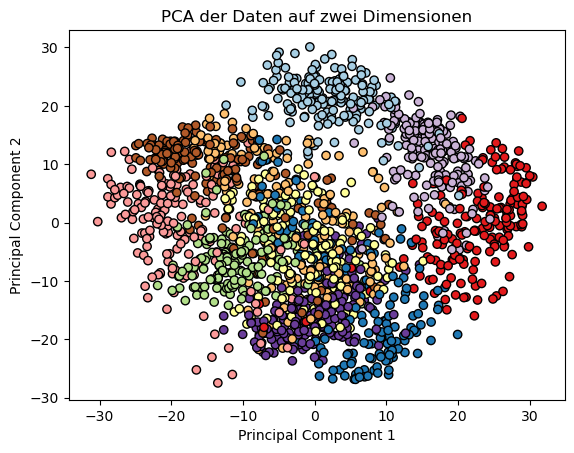

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

# Laden des Digits-Datensatzes
data, labels = load_digits(return_X_y=True)

# PCA mit zwei Dimensionen erstellen
pca_2d = PCA(n_components=2)
data_2d = pca_2d.fit_transform(data)

# Visualisierung der reduzierten Daten auf zwei Dimensionen
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, edgecolor='k', cmap=plt.cm.Paired)
plt.title('PCA der Daten auf zwei Dimensionen')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

<div class="alert alert-block alert-success">
<b>Arbeitsauftrag:</b> 
Wiederholen Sie Ihren Code, verwenden Sie aber nun kMeans, um die zweidimensionalen Daten in 10 Cluster (= die zehn Ziffern) einzuteilen. Visualisieren Sie Ihr Ergebnis. Das Ergebnis sollte ungefähr so aussehen wie in diesem Bild:<br><br>
<img src="img/2.png" width=100px>
</div>

Tipp: mit folgendem Code können Sie bunte Scatter-Plots erzeugen:
```
import matplotlib.pyplot as plt
clusters = ... clusters vom kMeans ...
plt.scatter(x=reduced_data[:, 0], y=reduced_data[:, 1], c=clusters)
```

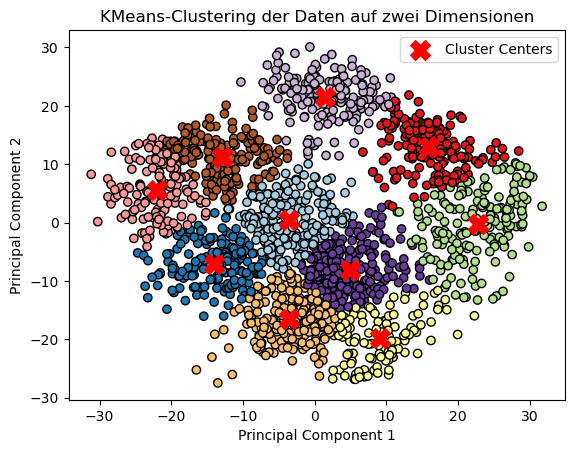

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

data, labels = load_digits(return_X_y=True)

pca_2d = PCA(n_components=2)
data_2d = pca_2d.fit_transform(data)

kmeans = KMeans(n_clusters=10, n_init=10)
clusters = kmeans.fit_predict(data_2d)

plt.scatter(data_2d[:, 0], data_2d[:, 1], c=clusters, edgecolor='k', cmap=plt.cm.Paired)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='X', c='red', label='Cluster Centers')
plt.title('KMeans-Clustering der Daten auf zwei Dimensionen')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

<div class="alert alert-block alert-success">
<b>Arbeitsauftrag:</b> 
Wir wollen nun evaluieren, wie gut unser Clustering ist. Warum können wir nicht einfach die Accuracy des Labelings bestimmen?
</div>

<div class="alert alert-block alert-success">
<b>Arbeitsauftrag:</b> 
Wir verwenden stattdessen den Rand Index (--> Wikipedia), den Sie zwischen den zwischen den ursprünglichen Labels und den vorhergesagten Labels wie unten gezeigt bestimmten können.

Entwickeln Sie Code, der den ARI berechnet
- zwischen den Ziellabels und einem Clustering auf den Originaldaten,
- zwischen den Ziellabels und einem Clustering auf reduzierten Daten.


Welches Clustering ist besser?
</div>

In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

data, true_labels = load_digits(return_X_y=True)
kmeans_original = KMeans(n_clusters=10, n_init=10)
predicted_labels_original = kmeans_original.fit_predict(data)

ari_original = adjusted_rand_score(true_labels, predicted_labels_original)

print(f"ARI zwischen Ziellabels und Clustering auf Originaldaten: {ari_original}")

ARI zwischen Ziellabels und Clustering auf Originaldaten: 0.6678059134251331


In [3]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

data, true_labels = load_digits(return_X_y=True)

pca_2d = PCA(n_components=2)
data_2d = pca_2d.fit_transform(data)

kmeans_reduced = KMeans(n_clusters=10, n_init=10)
predicted_labels_reduced = kmeans_reduced.fit_predict(data_2d)
ari_reduced = adjusted_rand_score(true_labels, predicted_labels_reduced)

print(f"ARI zwischen Ziellabels und Clustering auf reduzierten Daten: {ari_reduced}")


ARI zwischen Ziellabels und Clustering auf reduzierten Daten: 0.39197804314404777


In [ ]:
 Clustering auf den Originaldaten ist besser unter berücksichtigung des ARI.